**`Classification`** is a fundamental concept in data science and machine learning. It involves categorizing data points into predefined classes or categories based on their features. The goal of classification is to build a model that can learn the patterns and relationships within the data and then use this knowledge to accurately predict the class of new, unseen data points.
<br>

Today we'll focus on some of the most widely used classification algorithms for data science and machine learning, they are:
<br>
**1. KNN(K-Nearest Neighbor)**
<br>
**2. Naive Baye**
<br>
**3. Decision Tree**
<br>
**4. SVM(Support Vector Machine)**
<br>

# KNN Classification
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/knn.png?raw=1" alt="KNN" width=58% height=49% title="KNN Algorithm">
<br>

**K-Nearest Neighbors** (KNN) classification is a simple yet effective machine learning algorithm used for both classification and regression tasks. It's a type of instance-based learning, where the algorithm doesn't explicitly learn a model from the training data but rather memorizes the entire training dataset to make predictions for new data points.
<br>

Here's how the K-Nearest Neighbors algorithm works for classification:

- **`Dataset:`** The algorithm requires a **labeled dataset**, where each data point has a **set of features** and a **corresponding class label**.
<br>

- **`Choosing K:`** `K` in KNN represents the number of nearest neighbors to consider when making a prediction for a new data point. This value is chosen before training the model and affects the algorithm's performance. A smaller K can make the model more sensitive to noise, while a larger K can smooth out predictions.
<br>

- **`Distance Metric:`** KNN uses a distance metric, such as Euclidean distance, to measure the similarity between data points. The distance metric determines how close or similar two data points are in the feature space.
<br>

- **`Prediction:`** When a new data point is presented to the KNN model, the algorithm calculates the distance between the new point and all points in the training dataset. It then selects the K nearest data points based on the calculated distances.
<br>

- **`Majority Voting:`** For classification tasks, KNN counts the occurrences of each class label among the K nearest neighbors and assigns the class label that appears most frequently. This is known as majority voting.
<br>

- **`Classification Result:`** The class label that receives the most votes among the K nearest neighbors is assigned as the predicted class label for the new data point.

## How KNN Actually Works

- At first step, we have start with a dataset where data-point/classes are already categorized according to correct labels. For this class we'll use a dataset categorizing cancer provided by **Wisconsin University**. Let's cluster the data using **PCA**.

In [ ]:
# importing required modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset using Pandas
data = pd.read_csv('../datasets/cancer_data.csv')

In [ ]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Column names and meanings:

- `id:` ID number
<br>

- `diagnosis:` The diagnosis of breast tissues (M = malignant, B = benign)
<br>

- `radius_mean:` mean of distances from center to points on the perimeter
<br>

- `texture_mean:` standard deviation of gray-scale values
<br>

- `perimeter_mean:` mean size of the core tumor
<br>

- `area_mean:` area of the tumor
<br>

This breast cancer dataset has 32 attributes that categorize the data, i've only explained a few here.

Now, let's get rid of **`id`** and **`Unnamed: 32`** features because we don't need to use them while diagnosing whether the patient has a cancer or not.


In [ ]:
data = data.drop(["id"], axis = 1)

data = data.drop(["Unnamed: 32"], axis = 1)

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# malignant data
malignant = data[data.diagnosis == "M"]

# benign data
benign = data[data.diagnosis == "B"]

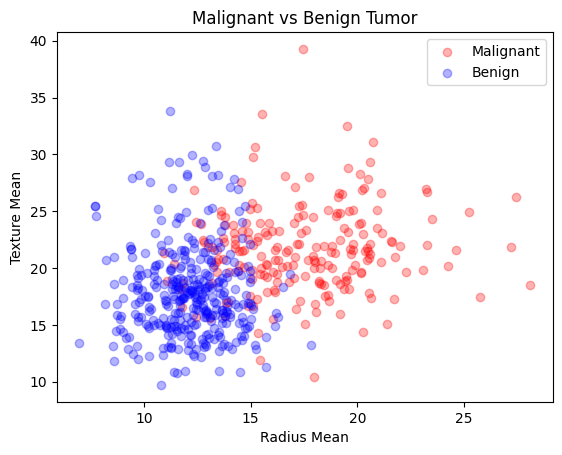

In [ ]:
# Cluster the categorized data
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(malignant.radius_mean, malignant.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(benign.radius_mean, benign.texture_mean, color = "blue", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

- Now during prediction we place the unseen data into the **feature space** cluster and we classify the new data using it's k-nearest **labeled** data-points. So, if **k=3** we'll see the 3 shortest distanced datapoints from our new unseed data and classify the new data by **majority voting**.
<br>

- **`Majority voting`** is the process of classifying a new data by looking at the occurrences of each class label among the **K-nearest** neighbors and then assigning the class label that appears most frequently. <br>

- **`Distance calculation`** can be done with any suitable distance metric. For example: euclidean distance,

In [ ]:
# KNN Classification with Sklearn
data.diagnosis = [1 if i == "M" else 0 for i in data.diagnosis]

x = data.drop(["diagnosis"], axis = 1) # x = features
y = data.diagnosis.values # y = labels



# Data Normalization:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [ ]:
# creating train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
# Predict Using KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)  # num_neighbors = 4
knn.fit(x_train, y_train)

prediction = knn.predict(x_test.values)

/home/rubayet/miniconda3/envs/edge/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Were using the **`x_train`** value and **`y_train`** values to create a **`feature space`** cluster and then using the **KNN.predict(x_test.values)** function to make prediction about the all the unseen data in **x_test** split. <br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/new_knn.png?raw=1" alt="KNN" width=41% height=21% title="KNN Algorithm">
<br>

In [ ]:
prediction

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

These are the predictions for all the values in **x_test**, **0** means **benign** and **1** means **malignant**.

So, a full train diagram of the k-nearest classification will look like:

<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/knn-train-flow.png?raw=1" alt="KNN" width=31% height=21% title="KNN Train Flow">
<br>

In [ ]:
# KNN Score
print("KNN score: ", knn.score(x_test.values, y_test))

KNN score:  0.8713450292397661


/home/rubayet/miniconda3/envs/edge/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


We can also try out different **k-values** and visualize which **k** value works best.

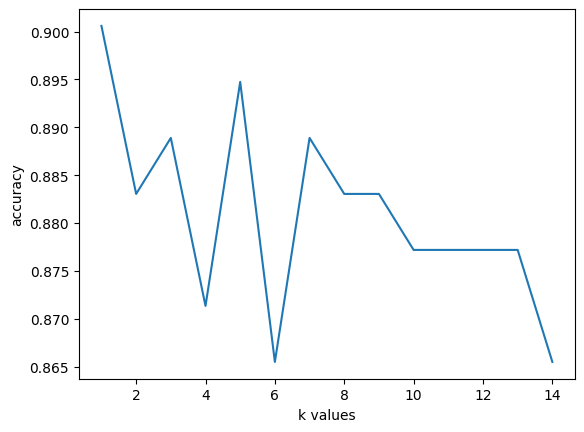

In [ ]:
scores = []
for i in range(1,15):
    knn_ = KNeighborsClassifier(n_neighbors = i)
    knn_.fit(x_train.values, y_train)
    scores.append(knn_.score(x_test.values, y_test))

plt.plot(range(1,15), scores)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

As we can see that **k=6** has the best accuracy and any value greater than **6** will decrease the accuracy of our classification.

# Naive Bayes

**Naive Bayes** is a classification algorithm based on the Bayes' theorem, which describes the probability of an event happening given prior knowledge of conditions that might be related to the event. The "naive" in Naive Bayes comes from the assumption that the features (attributes) used to predict the class are independent of each other, even though this assumption might not hold true in many real-world scenarios.

Despite its simplifying assumptions, Naive Bayes is a widely used and effective algorithm for text classification and other classification tasks, especially when dealing with high-dimensional datasets like text data. It's known for its simplicity, efficiency, and ability to handle a large number of features.

The Naive Bayes algorithm works as follows:

- **`Bayes Theorem:`**
  Bayes' theorem is used to calculate the **probability** of a particular class label given a set of feature values.

```python
P(class|features) = (P(features|class) * P(class)) / P(features)
```

**P(class|features)** is **`Posterior probability`**: Probability of being class A based on the observed features. <br>

**P(features|class)** is **`Likelihood probability`**: Probability of each features given that the probability of a class is 1.
<br>

**P(class)** is **`Prior Probability`**: Probability of being the class before observing the features.
<br>

**P(features)** is **`Marginal Probability`**: Probability of feature/features.

<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/naive-bayes.png?raw=1" alt="Naive Bayes" width=58% height=41% title="Naive Bayes">
<br>

## How Naive Bayes Works

The working process of the Naive Bayes Classifier can be explained using the following example:

Let's consider a dataset comprising weather conditions and a corresponding outcome variable **`Play`**. With this dataset, the objective is to determine whether playing should occur on a specific day based on prevailing weather conditions. To tackle this challenge, the ensuing steps need to be pursued:
<br>

  * Transform the provided dataset into tables that depict the frequencies of occurrences.
  <br>
  
  * Construct a Likelihood table by computing the probabilities of the provided features.
  <br>
  
  * Subsequently, apply Bayes' theorem to compute the posterior probability.
  <br>
  
Here's a table that visaulizes the weather condition and corresponding outcome of variable **`play`**.  
  
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/naive_bayes_table.png?raw=1" alt="Naive Bayes" width=76% height=49% title="Naive Bayes">
<br>

**Frequency table for the weather condition:**

<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/naive_bayes_table2.png?raw=1" alt="Naive Bayes" width=76% height=49% title="Naive Bayes">
<br>

**Likelihood table for the weather condition:**
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/naive_bayes_table3.png?raw=1" alt="Naive Bayes" width=76% height=49% title="Naive Bayes">
<br>


$$ P(Yes|Sunny)= P(Sunny|Yes)*P(Yes)/P(Sunny) $$

$$ P(Sunny|Yes)= 3/10= 0.3 $$

$$ P(Sunny)= 0.35 $$

$$ P(Yes)=0.71 $$

$$ So, P(Yes|Sunny) = 0.3*0.71/0.35= 0.60 $$

**So, the probability score of playing when the weather condition is sunny is 0.60.**


$$ P(No|Sunny)= P(Sunny|No)*P(No)/P(Sunny) $$

$$ P(Sunny|No)= 2/4=0.5 $$

$$ P(No)= 0.29 $$

$$ P(Sunny)= 0.35 $$

$$ So, P(No|Sunny)= 0.5*0.29/0.35 = 0.41 $$

**So, the probability score of not playing when the weather condition is sunny is 0.41.**
<br>

Since, **`P(Yes|Sunny) > P(No|Sunny)`**; we can say that the value of the variable **play** will be **Yes**.


### Classifying Iris Dataset With Naive Bayes

In [ ]:
iris=pd.read_csv('../datasets/Iris.csv')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# remove redundant column

iris.drop(columns="Id",inplace=True)

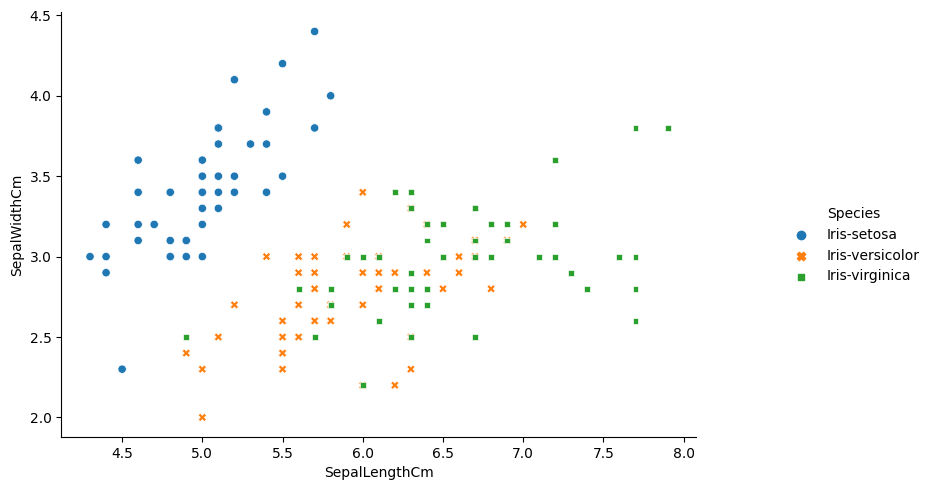

In [ ]:
# scatter plot of iris dataset

import seaborn as sns
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

**The iris dataset contains features of each class from cloumn 1-4 and the last column contains the label.**

In [ ]:
# extracting features and labels

X=iris.iloc[:,0:4].values # features
y=iris.iloc[:,4].values # labels

In [ ]:
# encoding labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


While **Naive Bayes** is often simple and efficient, there are certain limitations and potential problems associated with the Naive Bayes algorithm:

- **`Assumption of Independence:`** The core assumption of Naive Bayes is that all features are independent given the class label. This might not hold true for all datasets, especially if features are correlated. In such cases, the algorithm's performance can be compromised.
<br>

- **`Sensitive to Feature Scaling:`** Naive Bayes assumes that all features have the same impact on the classification result. If the features have different scales or distributions, the algorithm might not perform well. Preprocessing the data to have similar scales can help, but some information might be lost.
<br>

- **`Zero Probability Problem:`** If a feature does not appear in the training data for a particular class, the probability estimation for that feature becomes zero, leading to a breakdown in the Bayes' theorem calculation. Various techniques like Laplace smoothing can be used to mitigate this problem.
<br>

- **`Limited Expressiveness:`** Due to the assumption of independence, Naive Bayes might struggle to capture complex relationships in the data. It's not well-suited for tasks where feature interactions play a crucial role.
<br>

- **`Data Scarcity:`** Naive Bayes might not perform well when the training dataset is small, as it heavily relies on probability estimates from the training data. Insufficient data can lead to unreliable probability estimates.
<br>

# Decision Tree

Decision Tree Classification is a popular machine learning algorithm used for both classification and regression tasks. It's a type of supervised learning algorithm that learns a decision tree to make predictions based on input features. In the context of classification, a decision tree classifies instances into one of several predefined classes or categories.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/Decision-Tree-Classifier.png?raw=1" alt="Decision Tree" width=76% height=49% title="Decision Tree">
<br>

Here's a breakdown of how Decision Tree Classification works:

- **Tree Structure:** A decision tree is constructed in the form of a tree-like structure, where each internal node represents a decision based on the value of a particular feature, and each leaf node represents a class label or an outcome.
<br>

- **Feature Selection:** At each internal node, the algorithm selects a feature and a threshold value for that feature to split the data into subsets. The feature and threshold are chosen based on their ability to best separate the classes in the data.
<br>

- **Splitting Criteria:** The decision of which feature to split on and the threshold value is made using various splitting criteria such as Gini impurity, entropy, or mean squared error. These criteria help to determine the "purity" of the resulting subsets.
<br>

- **Recursive Process:** The process of selecting features and creating splits is repeated recursively for each subset until a stopping condition is met. Common stopping conditions include reaching a maximum depth, having a minimum number of samples in a node, or when the impurity reduction from a split is below a certain threshold.
<br>

- **Leaf Nodes:** Once the tree-building process is complete, the leaf nodes are assigned the majority class of the instances in that node. This majority class becomes the predicted class for instances that fall into that leaf.
<br>

- **Prediction:** To make a prediction, an instance traverses the decision tree from the root node down to a leaf node based on the feature values. The predicted class of the instance is then the class associated with the leaf node it reaches.
<br>

Decision trees are easy to understand and interpret, and they can handle both categorical and numerical features. However, they can be **prone to overfitting**, especially if the tree becomes too deep and complex.

### Types of Decision Trees

The categorization of decision trees is dependent on the nature of the target variable. It can be divided into two categories:

**1. Categorical Variable Decision Tree:** This type of decision tree pertains to scenarios where the target variable is categorical. In other words, if the target variable falls within the categorical domain, the decision tree is referred to as a categorical variable decision tree.
<br>

**2.Continuous Variable Decision Tree:** If the decision tree centers around a continuous target variable, it is termed a continuous variable decision tree.
<br>

For instance, let's consider a scenario where we aim to predict whether a customer will make a renewal premium payment with an insurance company **`(yes/no)`**. In this context, the income of customers holds significant importance. However, not all customers' income details are available to the insurance company. Consequently, a decision tree could be constructed to predict customer income based on factors such as occupation, product, and various other variables. In this instance, the tree is devised to forecast values for continuous variables.
<br>

### Key Concepts Associated with Decision Trees

- **Root Node:** This signifies the entirety of the population or sample, which subsequently branches into two or more homogeneous subsets.
<br>

- **Splitting:** This involves segmenting a node into two or more smaller sub-nodes.
<br>

- **Decision Node:** When a sub-node further splits into additional sub-nodes, it is designated as a decision node.
<br>

- **Leaf / Terminal Node:** Nodes that don't undergo further splitting are termed as leaf or terminal nodes.
<br>

- **Pruning:** The process of eliminating sub-nodes from a decision node is referred to as pruning. It can be considered the reverse of splitting.
<br>

- **Branch / Sub-Tree:** A segment of the entire tree that forms a subsection is termed as a branch or sub-tree.
<br>

- **Parent and Child Node:** A node that divides into sub-nodes is termed a parent node, while the sub-nodes are denoted as the children of the parent node.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/decision-tree-classification-algorithm.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>

Decision trees categorize instances by guiding them through the tree structure from the root to a leaf or terminal node. The classification of the instance is determined by the specific leaf or terminal node it reaches.

Within the tree, each node functions as a test scenario for a particular attribute. The edges stemming from the node signify potential solutions for the given test case. This recursive procedure continues for every subtree stemming from the new node.


### Assumptions Made During Decision Tree Creation

Outlined below are certain assumptions taken into account while employing a decision tree:

- At first, the complete training dataset is treated as the **root**.
<br>

- A preference is given to categorical feature values. If the values are continuous, they are transformed into discrete categories prior to constructing the model.
<br>

- Records are segregated in a recursive manner based on **attribute values**.
<br>

- The determination of which attributes should be positioned as the **root** or **internal node** of the tree is achieved through statistical methodologies.
<br>

Decision Trees adhere to the **Sum of Product (SOP)** representation, also known as **Disjunctive Normal Form**. For each class, the branches extending from the tree's root to a leaf node bearing the same class form a conjunction (product) of values. Conversely, distinct branches culminating in that class constitute a disjunction (sum).
<br>

The main challenge in implementing a decision trees is identifying the attributes suitable for placing as the root node and at each subsequent nodes. This task, known as **attribute selection**, involves using diverse attribute selection measures to ascertain the attribute that can serve as the root node at each level.

## How Does Decision Tree Work?

The way we decide to divide the tree has a big impact on how accurate it becomes. But the rules for making these decisions are not the same for trees that are used for categorizing objects and trees that are used for predicting numbers.
<br>

Decision trees employ a variety of algorithms to determine whether a node should be divided into multiple sub-nodes. Creating sub-nodes enhances the consistency of the resulting subsets. Put differently, the node's purity improves concerning the target variable. The tree divides nodes using all available variables and subsequently selects the split that yields the most uniform sub-nodes.
<br>

Algorithm choice is also contingent on the type of target variables. Let's examine some algorithms commonly used in Decision Trees:
```python
ID3 → (an extension of D3)
C4.5 → (the successor of ID3)
CART → (Classification And Regression Tree)
CHAID → (Chi-square automatic interaction detection)
MARS → (multivariate adaptive regression splines)
````

The **`ID3`** algorithm constructs decision trees through a top-down, **greedy search** approach across the potential branches without backtracking. As the name implies, a greedy algorithm always makes the choice that appears optimal at that particular moment.

### ID3 Algorithm in simple terms:

- Start with a big set of data called **S** as the root node.
<br>

- On each iteration of the algorithm, it iterates through the every unused attribute of the set **S** and calculates **Entropy(H**) and **Information gain(IG)** of this attribute.
<br>

- It picks the attribute that has the **smallest entropy** or the **largest information gain**.
<br>
    
- Uses the chosen attribute to split the set **s** into **subsets**.
<br>

- Keeps repeating this process for **each subset**, using only the attributes that have never been used before.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/id3-decision.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>

### Attribute Selection Measures

When working with Decision trees, a primary challenge arises in determining the optimal attribute selection for both the root node and its subsequent sub-nodes. To address this issue, a method known as **`Attribute Selection Measure (ASM)`** comes into play. ASM is a technique that facilitates the identification of the most suitable attributes for the tree's nodes. Two commonly employed techniques within **ASM** are:

- **Information Gain**
<br>

- **Gini Index**
<br>

#### Inofrmation Gain
Information gain helps us see how much things change when we split a group of data based on one attribute. It tells us how useful that one attribute is for understanding different class within the data. When we make a decision tree, we start with the most helpful attribute, the one that gives us the most information.

**`Information Gain Formula:`** $Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature)]$

Now what is entropy? **Entropy** is a metric to measure the impurity in a given attribute. It specifies randomness in data.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/entropy1.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>
To build a decision tree, we need to calculate two types of entropy using frequency tables:

**Entropy using the frequency table of a single attribute:**
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/entropy2.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>
Here $p_{i}$ is the probablity of randomly selecting an example in class **I**.

**Entropy using the frequency table of two attributes:**
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/entropy3.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>

**So, how do we actually calculate information gain?**

Information gain relies on how much the entropy decreases when we divide a set of data using a certain attribute. Building a decision tree is essentially about discovering the attribute that reduces the entropy the most(makes more pure).

**Step-1:** Calculate the entropy of the target(what we want to predict).
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/entropy5.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>

**Step-2:** After dividing the dataset based on various attributes, we compute the entropy for each branch. These entropies are combined in proportion to determine the overall entropy for the division. We then subtract this resulting entropy from the entropy value before the division. This calculation gives us the Information Gain, which represents the reduction in entropy.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/entropy6.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/entropy7.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>

**Step-3:** Select the attribute that offers the highest Information Gain as the decision point. Split the dataset into branches based on this attribute and repeat the same procedure for each branch.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/entropy8.png?raw=1" alt="Decision Tree" width=29% height=21% title="Decision Tree">
<br>

**Step-4** A branch with entropy **0** will be **leaf node**.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/entropy9.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/entropy10.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>

A beanch with entopy more than **0** needs **further splitting**
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/entropy11.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>

**So, a decision tree can easily be formed to a set of rules by mapping from the `root` node to the `leaf` nodes one by one.**
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/dt_entropy13.png?raw=1" alt="Decision Tree" width=49% height=31% title="Decision Tree">
<br>


### Gini Index

The Gini Index serves as a metric for assessing impurity or disparity in both statistical and financial contexts. In the realm of machine learning, it is employed as a measure of impurity within decision tree algorithms designed for classification purposes. Essentially, the Gini Index gauges the likelihood of a randomly selected sample being incorrectly classified by a decision tree algorithm, with its range spanning from 0 (completely pure) to 1 (completely impure).

Gini impurity is used in constructing Decision Trees to decide how the features of a dataset should be divided to create the tree. To be precise, Gini Impurity is a value ranging from 0 to 0.5, and it tells us how likely it is for new, randomly labeled data to be categorized incorrectly based on the class distribution in the dataset.

Imagine you want to create a system that predicts whether someone will fail to pay their credit card bills. You have data with details like age, income, credit history, and whether they're a student or not. To figure out which detail to use as the first split in your decision tree (the root node), you can see how well each detail separates the data into the right categories: those who default on payments ("yes") and those who don't ("no"). This measurement tells you how impure data split is, and you pick the detail that causes the least impurity as the best one for the first split. You keep doing this for each new level of the tree with the remaining details.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/gini_impurity1.png?raw=1" alt="Decision Tree" width=67% height=58% title="Decision Tree">
<br>


In the picture, the detail with the least impurity (minimum Gini Impurity) is chosen as the starting point for the decision tree.

### Mathematical Definiton of Gini Index

Think about a dataset **`D`** with different **`K`** number of classes. We want to figure out how likely it is for a piece of data to belong to one of these classes at a specific point in our analysis, which we'll represent as **`p`**. So, the probability of samples belonging to class **i** at a given node can be denoted as $p_i$. The Gini Impurity of dataset **D** in this situation is then calculated as follows:

$$Gini(D) = 1 - \sum^{K}_{i=1} {p^2_i}$$

The node where each class is equally represented has the most impurity. The least impurity occurs when every record belongs to the same class. The table below provides various examples to illustrate how Gini Impurity is calculated.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/gini_impurity2.png?raw=1" alt="Decision Tree" width=67% height=58% title="Decision Tree">
<br>

The attribute which has smallest gini impurity value is chosen for splitting the node. If a dataset **D** is split using an attribute **A** into two subests **D1** and **D2** with respective sizes **n1** and **n2**, then the **Gini Impurity** will be:

$$Gini_{A}(D) = \frac{n1}{n}Gini(D1) + \frac{n2}{n}Gini(D2)$$

Using this, we can find out the attribute **A** that has the smallest $Gini_{A}(D)$ value and use that attribute to split the dataset **D**. <br>

To calculate the information gain associated with an attribute, you subtract the weighted impurity of its branches from the initial impurity. Alternatively, you can determine the optimal split by maximizing the Gini gain, which is computed in the following manner:

$$Gini(A) = Gini(D)-Gini_{A}(D)$$

### Visualizing Gini Impurity

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Defining a simple dataset
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data1 ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

           age  income student credit_rate default
0        youth    high      no        fair      no
1        youth    high      no   excellent      no
2   middle_age    high      no        fair     yes
3       senior  medium      no        fair     yes
4       senior     low     yes        fair     yes
5       senior     low     yes   excellent      no
6   middle_age     low     yes   excellent     yes
7        youth  medium      no        fair      no
8        youth     low     yes        fair     yes
9       senior  medium     yes        fair     yes
10       youth  medium     yes   excellent     yes
11  middle_age  medium      no   excellent     yes
12  middle_age    high     yes        fair     yes
13      senior  medium      no   excellent      no


In [ ]:
# STEP 1: Calculate gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

class_value_counts = df1[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
default
yes    9
no     5
Name: count, dtype: int64

Gini Impurity of the class is 0.459


In [ ]:
# STEP 2:
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = df1[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = df1[class_name][df1[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df1.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for age is 0.343
Gini for income is 0.440
Gini for student is 0.367
Gini for credit_rate is 0.429


In [ ]:
# STEP 3:
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3f} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3f} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.343 
The maximum value of Gini Gain     : 0.657 
The selected attiribute is:  age


### Training a prediction model using Decision Tree

Now, let us train a prediction model using Decision Tree with the help of sklearn library.

#### Loading required libraries

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#### Loading the pima indian diabetic dataset

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
dataframe = pd.read_csv("../datasets/diabetes.csv", header=None, names=col_names)

In [ ]:
dataframe.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


#### Feature Selection

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = dataframe[feature_cols] # Features
y = dataframe.label # Target variable

#### Splitting the data

In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X[1:], y[1:], test_size=0.3, random_state=1)

#### Building the Decision Tree model

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluating the model
Let's estimate how accurately our classifier can predict the outcome of a patient given all the required information for inference.

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


### Let's Visualize our Decision Tree
You can use Scikit-learn's export_graphviz function to showcase the tree within a Jupyter notebook. To visualize the tree, you'll also need to install graphviz and pydotplus.

In [ ]:
! pip install graphviz

In [ ]:
! pip install pydotplus

In [ ]:
! conda install python-graphviz -y

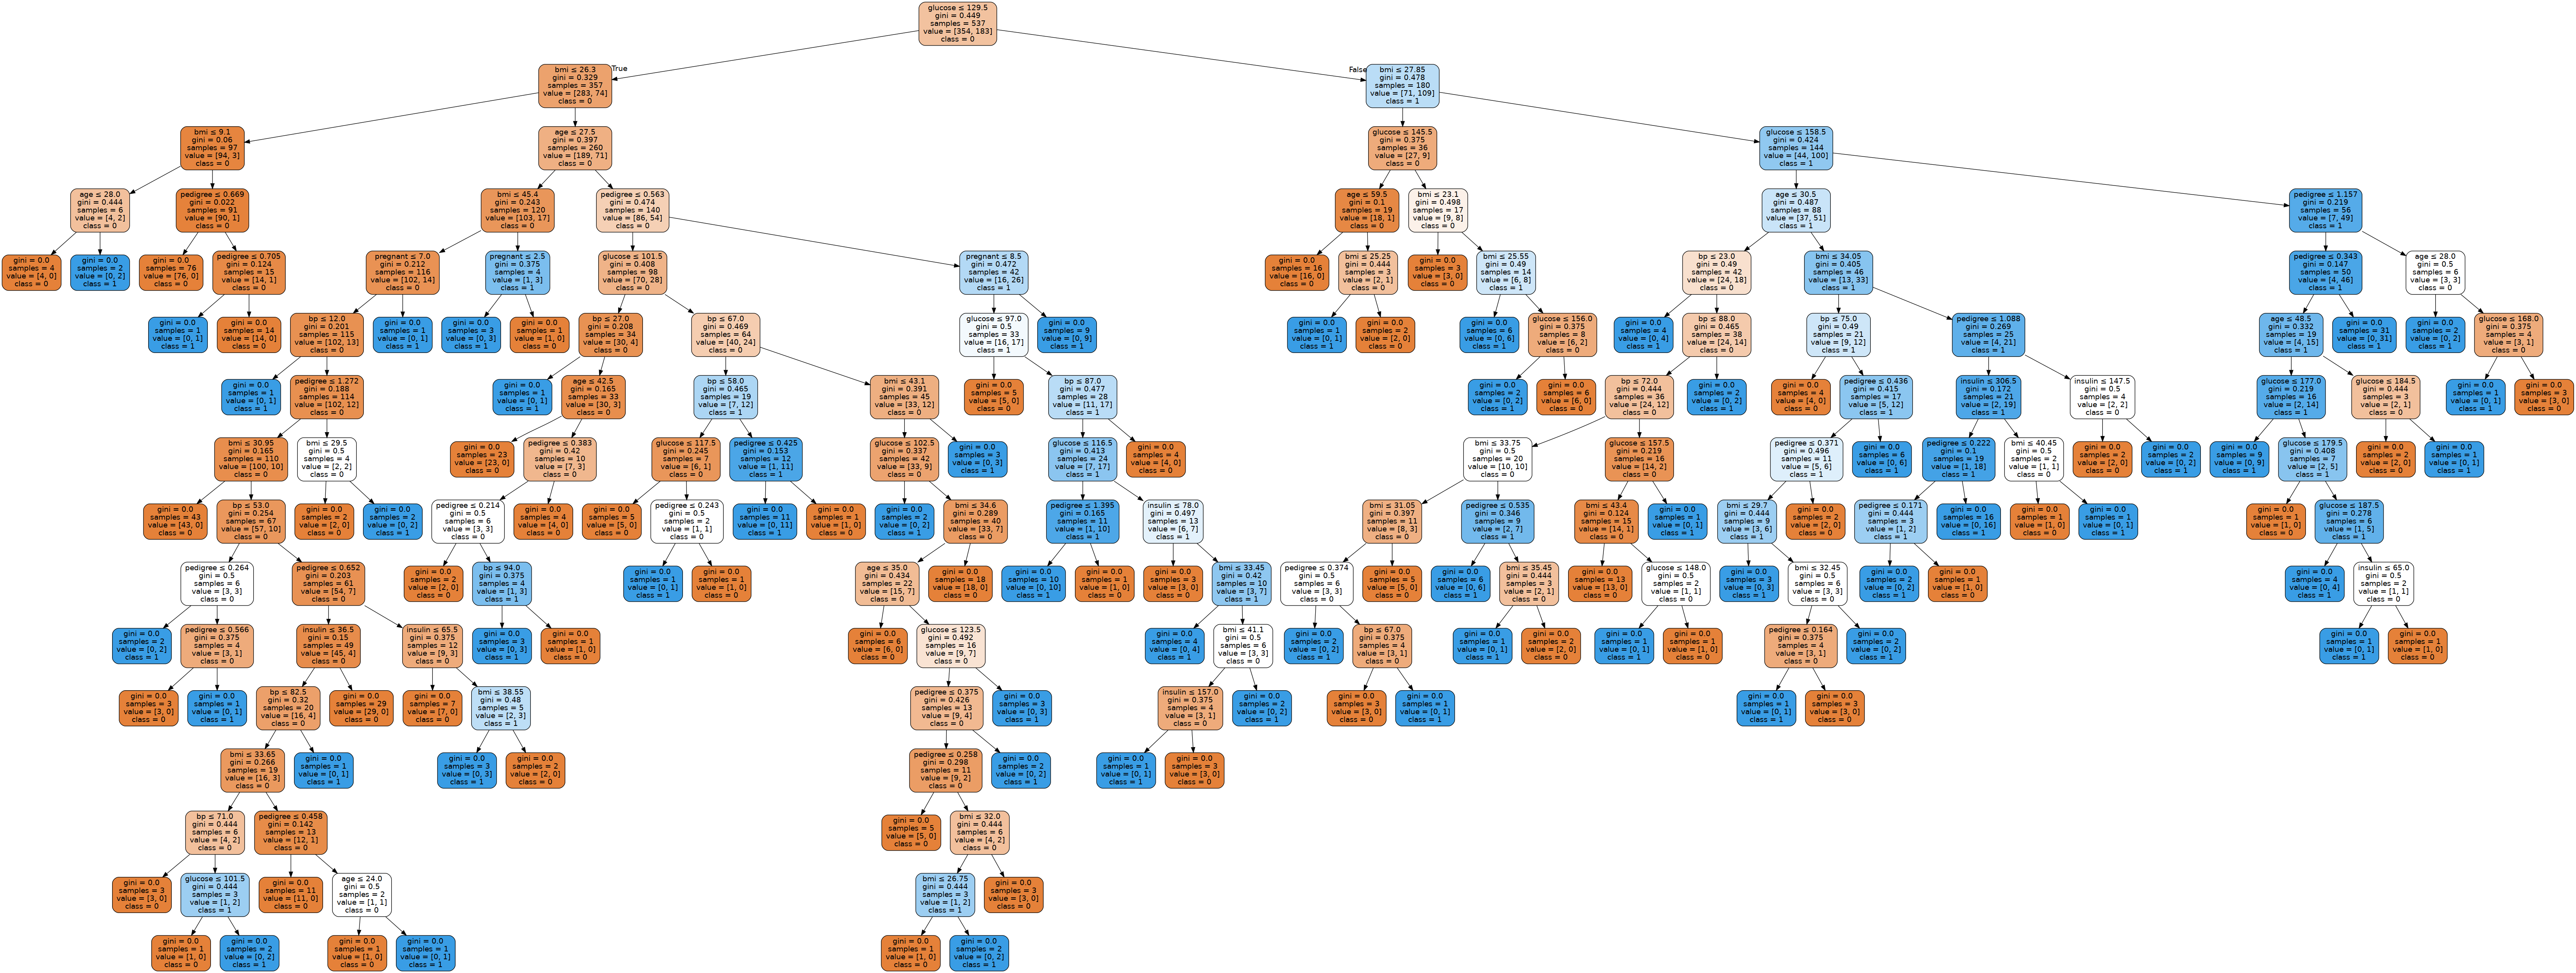

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../datasets/diabetes.png')
Image(graph.create_png())

## Support Vector Machine(SVM)

**`Support Vector Machines`** are thought of as a classification method, but they can be applied to both classification and regression tasks. They are well-suited for handling a variety of variables, including both continuous and categorical ones. SVM constructs a hyperplane in a multi-dimensional space to distinguish between different classes. This hyperplane is derived iteratively to minimize errors. The fundamental concept behind SVM is to discover the **`maximum marginal hyperplane (MMH)`** that effectively separates the dataset into its respective classes.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/svm1.webp?raw=1" alt="Decision Tree" width=58% height=41% title="Decision Tree">
<br>

### Support Vectors
Support vectors refer to the data points that are nearest to the hyperplane. These specific points contribute significantly to defining the separation line by determining the margins, making them highly relevant in building the classifier.

### Margin
A margin represents the space between the two lines that encompass the closest points of each class. It's determined by measuring the perpendicular distance from the line to the support vectors or the nearest points. A wider margin between the classes is deemed favorable, signifying a good margin, whereas a narrower margin is considered unfavorable, indicating a poor margin.

### Hyperplane
A hyperplane is a decision boundary that divides a group of objects with varying class memberships.

### How Does SVM work?

The primary goal is to effectively separate the provided **dataset**. The term **`margin`** refers to the distance between the nearest points of different classes. The objective is to identify a hyperplane that maximizes this margin between the support vectors within the dataset. SVM accomplishes this through the following steps:

- First, it generates multiple hyperplanes aimed at achieving the best possible separation between classes. In the left-hand illustration, you can see three hyperplanes: black, blue, and orange. Among these, the black hyperplane correctly separates the two classes, while the blue and orange ones exhibit higher classification errors.
<br>

- The next step involves selecting the correct hyperplane that maximizes the separation between the nearest data points, as illustrated in the right-hand figure.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/svm2.webp?raw=1" alt="Decision Tree" width=58% height=41% title="Decision Tree">
<br>

#### Non-linear and Inseperable Planes
Certain problems cannot be effectively addressed using a linear hyperplane, as depicted in the left-hand side of the figure below.

In such cases, SVM employs a kernel trick to convert the input space into a higher-dimensional space, as illustrated on the right. In this transformed space, data points are represented along both the x-axis and the z-axis (where Z corresponds to the squared sum of both x and y: z = $x^2$ + $y^2$). This transformation enables straightforward separation of these points using a linear boundary.
<br>
<img src="https://github.com/EDGE-Programe/Python-Basics/blob/master/Python_edge_program/Data%20Science/notebook_images/nb_23/svm3.webp?raw=1" alt="Decision Tree" width=58% height=41% title="Decision Tree">
<br>

### SVM Kernels

In practical SVM implementation, a kernel is employed to perform the algorithm. The kernel transforms the input data space into the necessary format. SVM utilizes a method known as the **`kernel trick`**. Essentially, this technique takes a **`low-dimensional`** input space and converts it into a **`higher-dimensional`** space. In simpler terms, it can be thought of as enhancing the dimensionality of a non-separable problem to make it separable. This approach is particularly valuable for addressing non-linear separation challenges and aids in constructing a more precise classifier.

**`Linear Kernel:`** A linear kernel can be applied just like the standard dot product between any two provided observations. It involves calculating the sum of the products of corresponding pairs of input values within two vectors.

```python
K(x, xi) = sum(x * xi)
```

**`Polynomial Kernel:`** A polynomial kernel represents a broader and more generalized version of the linear kernel. It is capable of discerning non-linear or curved patterns within the input space.  

```python
K(x,xi) = 1 + sum(x * xi)^d
```
Here **`d`** is the degree of the polynomial. **d=1** is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.

**`Radial Basis Function Kernel:`** The Radial basis function (RBF) kernel is a widely used kernel function in support vector machine classification. RBF has the ability to transform an input space into an infinite-dimensional space.

```python
K(x,xi) = exp(-gamma * sum((x – xi^2))
```
In this context, gamma is a parameter that falls within the **`range of 0 to 1`**. A higher gamma value results in a perfect fit to the training dataset, which can lead to overfitting. Typically, a value of **gamma=0.1** is regarded as a suitable default choice. You have to manually specify the gamma value when configuring the learning algorithm.

## Let's Build a SVM Model

Let us build a svm prediction model using sklearn and also visualize how it works to predict classes using hyperplame margins.

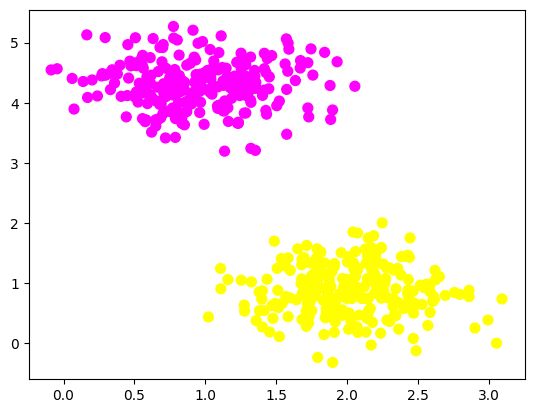

In [ ]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs

# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2,random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show()

Here, we can see data points of **two** different classes.

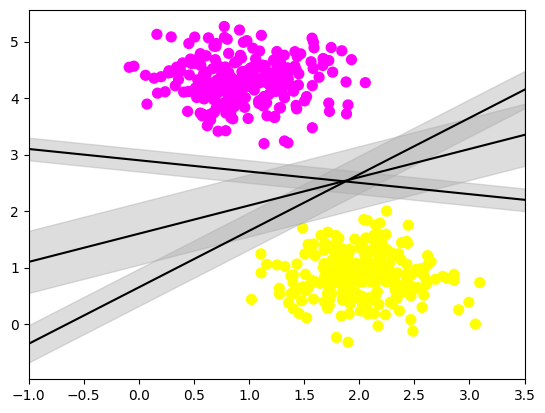

In [ ]:
# creating linspace between -1 to 3.5
xfit = np.linspace(-1, 3.5)

# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

# plot a line between the different sets of data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.show()

### Classifer Using SVM

To build our classifier model let's utilize the well-known cancer dataset, which is a prominent multi-class classification problem. This dataset originates from the digitized image of a fine needle aspirate (FNA) of a breast mass, and it provides descriptions of the characteristics of cell nuclei found within the image.

The dataset includes **`30 features`**, encompassing attributes such as mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, and worst fractal dimension. Additionally, it contains a target variable specifying the type of cancer.

This dataset categorizes cancer into two classes: malignant (harmful) and benign (not harmful). With this dataset, you have the opportunity to construct a model for classifying the type of cancer. You can access the dataset through the scikit-learn library or download it from the UCI Machine Learning Library.

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

print()

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Labels:  ['malignant' 'benign']


In [ ]:
# Shape of the dataset
# print data(feature)shape
cancer.data.shape

(569, 30)

So, we can see that; we have **569** records(rows) with **30** features(columns).

In [ ]:
# print the cancer data features (top 4 records)
print(cancer.data[0:4])

# empty space
print()

# shape of only one data
print(cancer.data[0].shape)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [ ]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

# empty space
print()

# target shape should be (569,)
print(cancer.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


Well, we have an accuracy of **96.5%**, which is really good in-terms of a classifier model. Now, let's find out our models precision and recall value.

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


### Advantages:
SVM Classifiers provide high accuracy and faster prediction in comparison to the Naïve Bayes algorithm. They are memory-efficient as they rely on a subset of training points during the decision-making process. SVM performs effectively when there's a distinct separation margin and in scenarios involving high-dimensional data.
<br>

### Disadvantages:
SVM is less suitable for large datasets due to its lengthy training times, and it requires more training time compared to Naïve Bayes. It performs poorly when dealing with overlapping classes and is also highly sensitive to the choice of kernel function.